In [87]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [23]:
iris = load_iris()

In [24]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
X = iris.data

In [34]:
var_list = []
for i in range(1,11,1):
    print(i)
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    var_list.append([i, kmeans.inertia_])

1
2
3
4
5
6
7
8
9
10


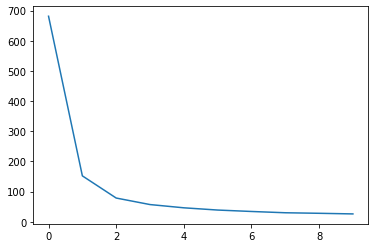

In [38]:
plt.plot([w[1] for w in var_list])

In [39]:
kmeans = KMeans(n_clusters=3, random_state=12345)
kmeans.fit(X)
y = kmeans.predict(X)

In [48]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [41]:
iris_df = pd.DataFrame(X, columns=iris.feature_names)

In [42]:
iris_df["cluster"] = y

In [44]:
iris_df.groupby("cluster").mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,6.850000,3.073684,5.742105,2.071053
1,5.006000,3.428000,1.462000,0.246000
2,5.901613,2.748387,4.393548,1.433871


In [54]:
iris_df.loc[iris_df["cluster"]==0, "cluster"] = "tipo_2"

In [55]:
iris_df["true_label"] = iris.target

In [62]:
iris_df.iloc[100:150]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,true_label
100,6.3,3.3,6.0,2.5,tipo_2,2
101,5.8,2.7,5.1,1.9,tipo_1,2
102,7.1,3.0,5.9,2.1,tipo_2,2
103,6.3,2.9,5.6,1.8,tipo_2,2
104,6.5,3.0,5.8,2.2,tipo_2,2
105,7.6,3.0,6.6,2.1,tipo_2,2
106,4.9,2.5,4.5,1.7,tipo_1,2
107,7.3,2.9,6.3,1.8,tipo_2,2
108,6.7,2.5,5.8,1.8,tipo_2,2
109,7.2,3.6,6.1,2.5,tipo_2,2


In [64]:
iris_df.groupby("cluster").mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),true_label
cluster,,,,,
tipo_0,5.006000,3.428000,1.462000,0.246000,0.000000
tipo_1,5.901613,2.748387,4.393548,1.433871,1.225806
tipo_2,6.850000,3.073684,5.742105,2.071053,1.947368


# Classificacao

In [15]:
y=iris.target

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [18]:
clf = LogisticRegression()

In [19]:
clf.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred = clf.predict(X_test)

In [21]:
y_test

array([2, 1, 2, 0, 2, 0, 1, 1, 1, 2, 0, 2, 0, 1, 2, 1, 2, 2, 1, 0, 1, 1,
       1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2])

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [23]:
confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]])